# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18524281,
            "total_supply": 18524281,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13161.84,
                    "volume_24h": 26619657908,
                    "market_cap": 243673045817,
                    "percentage_change_1h": 0.321228719060922,
                    "percentage_change_24h": 1.00868357859159,
                    "percentage_change_7d": 15.0956155009924,
                    "percent_change_1h": 0.321228719060922,
                    "percent_change_24h": 1.00868357859159,
                    "percent_change_7d": 15.0956155009924
                },
                "CAD": {
                    "price": 17290.709208,
                    "volume_24h": 34970244593.7396,
                    

In [7]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
#print(btc_value)
my_btc_value = my_btc * btc_value
# YOUR CODE HERE!
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Compute current value of my crpto
# Print current crypto wallet balance
# YOUR CODE HERE!
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15794.21
The current value of your 5.3 ETH is $2221.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50


In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3591541  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62796942

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# print the data 
df_savings 

,amount
crypto,23561.795489
shares,40938.500000


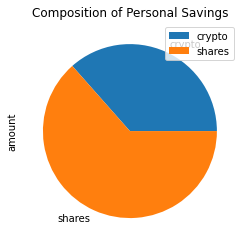

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value
# Validate saving health
# YOUR CODE HERE!
#for emergency_fund in total_savings:
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")
              

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                       SPY          \
              open     high     low   close   volume    open    high   
2015-10-16  109.90  109.940  109.78  109.78  1497588  202.83  203.29   
2015-10-19  109.78  109.895  109.65  109.85  1289942  202.50  203.37   
2015-10-20  109.64  109.780  109.55  109.65  1672562  202.85  203.84   
2015-10-21  109.73  109.950  109.73  109.89  1119723  203.61  203.79   
2015-10-22  109.90  110.050  109.83  109.94  1817244  202.98  205.51   

                                         
                 low   close     volume  
2015-10-16  201.9200  203.14   79323870  
2015-10-19  202.1300  203.33   61255929  
2015-10-20  202.5471  203.07   60081395  
2015-10-21  201.6500  201.82   83704739  
2015-10-22  202.8100  205.22  121670959

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999758,0.995276,0.997103,1.007354,0.997983,1.006741,0.999475,0.995535,0.992592,1.001004,...,1.014030,1.002631,1.016608,0.998095,1.003908,1.007247,1.001994,0.987494,0.998659,0.990091
2,1.009354,0.987983,0.995382,1.015300,0.996079,1.014301,0.996639,0.998051,0.989483,1.007528,...,1.005327,1.003324,1.011870,0.996452,1.010384,0.996516,1.008767,0.987149,1.013188,0.975945
3,1.000780,0.991693,0.993694,1.006140,0.990403,1.024899,1.009715,0.994588,0.993168,1.017286,...,0.999353,0.996052,1.015602,0.982726,1.019038,0.988798,0.993138,0.979109,1.012182,0.985796
4,0.997723,0.988736,0.993650,0.997419,0.985201,1.025758,1.010543,1.007063,1.000674,1.012564,...,0.987729,0.992297,1.010518,0.988732,1.026476,0.981070,1.002237,0.965714,1.018552,0.979000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.416479,8.498577,15.586993,15.185570,5.359170,5.100037,6.062182,7.132836,4.389021,42.479277,...,9.772506,7.666036,3.246613,8.371370,22.251850,27.557397,13.092485,6.346161,8.142441,5.778025
7557,11.266797,8.457655,15.513338,15.142936,5.370886,5.102555,5.997778,7.118377,4.354578,42.471580,...,9.741731,7.700947,3.259791,8.358822,22.177084,27.634602,13.109857,6.411700,8.030263,5.749795
7558,11.374171,8.555631,15.582839,15.055239,5.356642,5.132214,6.046301,7.163529,4.388354,42.373113,...,9.672181,7.661288,3.285612,8.453254,22.232091,27.499310,12.975755,6.425129,7.890144,5.785770
7559,11.434997,8.576243,15.344965,15.179267,5.370202,5.132225,6.034673,7.183215,4.399084,41.976002,...,9.740116,7.573300,3.260166,8.522935,22.368637,27.357859,13.053830,6.309200,7.992200,5.807269


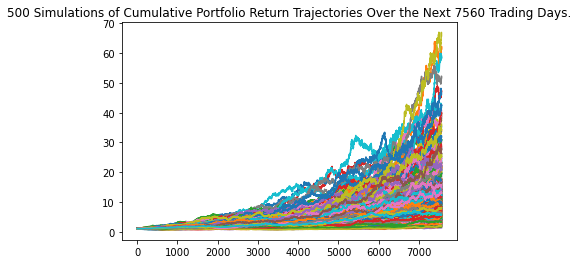

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

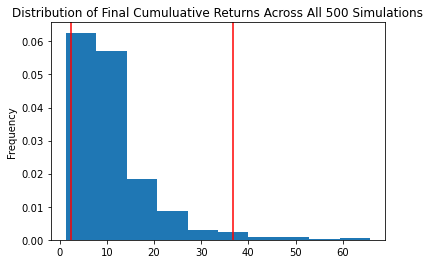

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean             11.336410
std               8.700708
min               1.297574
25%               5.820154
50%               9.072688
75%              13.575530
max              65.822212
95% CI Lower      2.433408
95% CI Upper     36.834420
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48668.16 and $736688.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $73002.24 and $1105032.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003293,0.998014,1.001203,1.002408,0.997356,0.991205,1.001741,0.993333,0.998548,1.002539,...,0.991498,0.997672,1.006609,1.009629,1.010061,0.998655,0.992943,1.002326,1.001828,1.008664
2,0.992416,1.002039,0.983842,1.004858,0.987065,0.997491,0.992983,1.005943,0.988531,1.016157,...,0.995709,1.002529,1.007708,1.011150,1.010360,1.003685,1.004887,1.012194,0.996970,1.030023
3,1.000269,1.006961,0.994992,1.015018,0.983589,1.000243,1.004450,1.017647,0.975142,1.013795,...,0.996465,0.994358,0.998867,1.012485,1.015781,0.990823,1.016638,1.003914,1.016097,1.033177
4,1.011592,1.006425,1.002855,1.012177,0.977735,1.003927,1.007478,1.017348,0.955711,1.004236,...,1.001696,0.979926,0.992436,1.000549,1.011759,0.993121,1.027469,1.000558,1.019583,1.029806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.563889,3.229429,1.188007,1.860192,1.337157,1.200406,1.123989,2.056840,1.562055,1.325531,...,1.681585,1.761425,1.265141,1.094383,1.817903,1.723872,2.506926,1.423439,1.665411,1.865386
1257,1.556160,3.235258,1.184268,1.878455,1.345633,1.201380,1.130774,2.082699,1.555512,1.319614,...,1.689232,1.767617,1.282913,1.105342,1.799535,1.734366,2.527378,1.439355,1.652572,1.872670
1258,1.562412,3.264188,1.198986,1.879888,1.329914,1.199232,1.131643,2.046008,1.568933,1.316186,...,1.694269,1.775432,1.276804,1.103120,1.795870,1.754249,2.549412,1.446676,1.675628,1.887845
1259,1.568293,3.281514,1.195939,1.865772,1.321187,1.194534,1.138402,2.039782,1.563688,1.309164,...,1.684385,1.777506,1.278738,1.098182,1.816631,1.767630,2.549705,1.453002,1.684081,1.870033


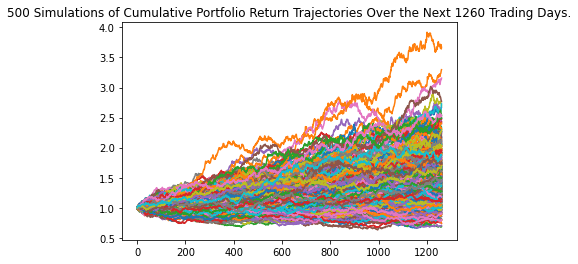

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_even_dist_five.plot_simulation()

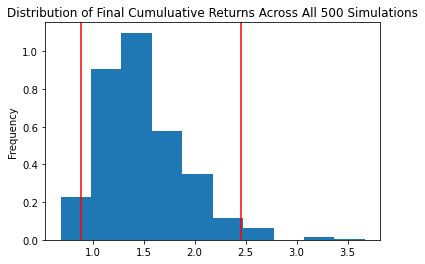

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)

count           500.000000
mean              1.487265
std               0.407089
min               0.684242
25%               1.216867
50%               1.408073
75%               1.697209
max               3.669508
95% CI Lower      0.888358
95% CI Upper      2.450693
Name: 1260, dtype: float64


In [30]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53301.48 and $147041.59


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                    SPY  \
              open     high     low   close   volume daily_return    open   
2015-10-16  109.90  109.940  109.78  109.78  1497588          NaN  202.83   
2015-10-19  109.78  109.895  109.65  109.85  1289942     0.000638  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244     0.000455  202.98   

                                                              
              high       low   close     volume daily_return  
2015-10-16  203.29  201.9200  203.14   79323870          NaN  
2015-10-19  203.37  202.1300  203.33   61255929     0.000935  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012839,0.992221,1.015259,0.995829,0.989660,1.007510,0.998419,1.005199,1.013085,1.001787,...,1.005568,1.010431,1.006574,0.994725,1.007128,0.994529,1.004458,1.005858,0.993634,1.000305
2,1.004595,0.990561,1.017005,0.991058,0.994970,1.008843,0.991503,1.002888,1.007826,1.010161,...,1.012450,1.028664,0.998726,0.987699,1.006057,0.988061,1.002703,1.014812,0.999869,0.990956
3,1.015920,0.991663,1.016647,0.999896,1.001143,1.019950,0.980355,0.991541,1.024424,1.013917,...,1.015288,1.034653,1.003512,0.982007,1.017627,0.994468,0.998602,1.017207,0.998043,0.995109
4,1.013448,0.986681,1.014111,1.007421,1.015405,1.015005,0.978548,0.987620,1.026331,1.004030,...,1.023636,1.039012,0.990399,0.968198,1.019785,0.993985,0.988012,1.009938,0.992094,0.987842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.687293,2.646207,1.262985,3.331846,2.438020,1.318844,3.211200,3.195361,1.779922,3.077996,...,3.325306,1.718692,3.108976,1.587024,1.624500,3.094910,1.404343,1.686397,1.411886,2.804435
2517,1.679481,2.665683,1.261585,3.379203,2.446932,1.322588,3.160597,3.243507,1.797288,3.106911,...,3.320675,1.710277,3.128306,1.590624,1.604690,3.112686,1.407327,1.691762,1.420644,2.821540
2518,1.671073,2.688348,1.264556,3.380779,2.459979,1.328228,3.184628,3.220384,1.782717,3.106336,...,3.304740,1.718900,3.138450,1.580788,1.609427,3.134345,1.397118,1.698152,1.446625,2.880354
2519,1.671089,2.679506,1.265521,3.362292,2.430881,1.352428,3.210814,3.233998,1.784997,3.061189,...,3.295190,1.714715,3.118594,1.586514,1.612038,3.148352,1.382011,1.705836,1.457820,2.869615


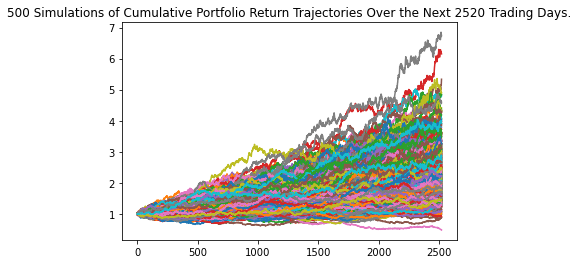

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()

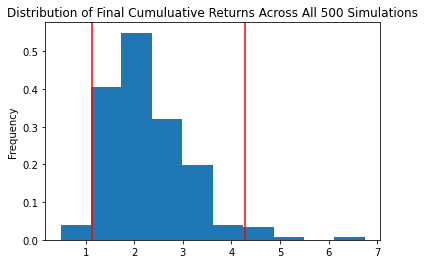

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)

count           500.000000
mean              2.266479
std               0.817200
min               0.484455
25%               1.678243
50%               2.121324
75%               2.691303
max               6.747245
95% CI Lower      1.133213
95% CI Upper      4.283896
Name: 2520, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $67992.77 and $257033.78
